In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
import sklearn
from sklearn.metrics import silhouette_score
from keras.datasets import cifar10
from sklearn.metrics import davies_bouldin_score
from keras.layers import Input, Conv2D, MaxPooling2D,UpSampling2D
from tensorflow.keras import optimizers
from keras.models import Model
from sklearn.cluster import KMeans

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(" Training Dataset size : ", x_train.shape)

170508288/170498071 [==============================] - 2s 0us/step
 Training Dataset size :  (50000, 32, 32, 3)


<Figure size 432x288 with 0 Axes>

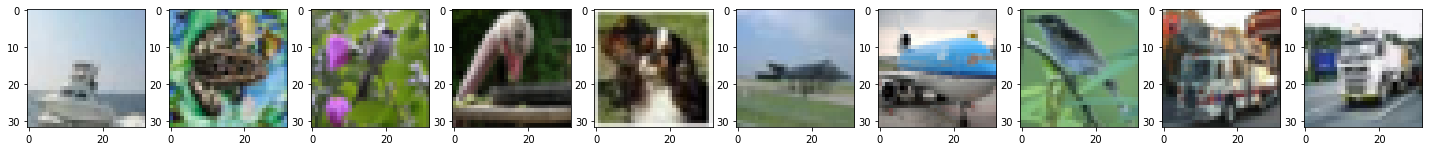

In [ ]:
#  Original Images before auto-encoder. Picking random 10 images
plt.figure()
a, b = plt.subplots(1,10,figsize=(25,25))
b[0].imshow(x_train[100])
b[1].imshow(x_train[200])
b[2].imshow(x_train[300])
b[3].imshow(x_train[400])
b[4].imshow(x_train[500])
b[5].imshow(x_train[600])
b[6].imshow(x_train[700])
b[7].imshow(x_train[800])
b[8].imshow(x_train[900])
b[9].imshow(x_train[1000])
 

In [ ]:

#  Normalizing dataset
x_train = x_train/255
x_test = x_test/255
 
# ENCODER 
input_size = Input(shape=(32, 32, 3)) 
encode = Conv2D(64, strides=1, kernel_size=2, activation='relu', padding='same')(input_size)
# encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(32, strides=1, kernel_size=2, activation='relu', padding='same')(encode)
# encode = MaxPooling2D((2, 2), padding='same')(encode)
encode = Conv2D(16, strides=1, kernel_size=2, activation='relu', padding='same')(encode)

# DECODER
decode = Conv2D(16, strides=1, kernel_size=2, activation='relu', padding='same')(encode)
# decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(32, strides=1, kernel_size=2, activation='relu', padding='same')(decode)
# decode = UpSampling2D((2, 2))(decode)
decode = Conv2D(64, strides=1, kernel_size=2, activation='relu', padding='same')(decode)
decode = Conv2D(3, strides=1, kernel_size=2, activation='sigmoid', padding='same')(decode)


Model = Model(input_size, decode)
Model.summary()

Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = Model.fit(x_train, x_train,epochs=10,validation_data=(x_test, x_test))





Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        8224      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 16)        2064      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        1040      
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        2080      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        8256  

KeyboardInterrupt: ignored

In [ ]:
predictions = Model.predict(x_train)

<Figure size 432x288 with 0 Axes>

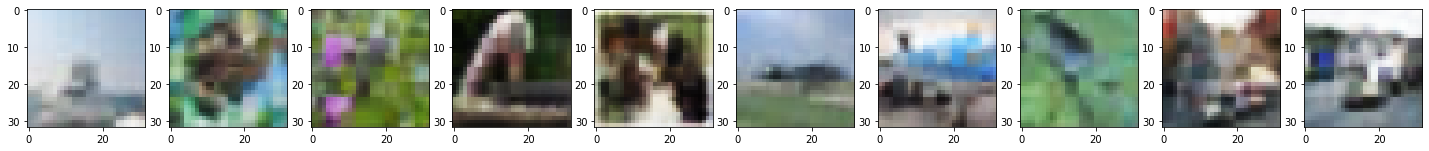

In [ ]:
# Images generated post Auto-encoder  

plt.figure()
a, b = plt.subplots(1,10,figsize=(25,25))
b[0].imshow(predictions[100])
b[1].imshow(predictions[200])
b[2].imshow(predictions[300])
b[3].imshow(predictions[400])
b[4].imshow(predictions[500])
b[5].imshow(predictions[600])
b[6].imshow(predictions[700])
b[7].imshow(predictions[800])
b[8].imshow(predictions[900])
b[9].imshow(predictions[1000])


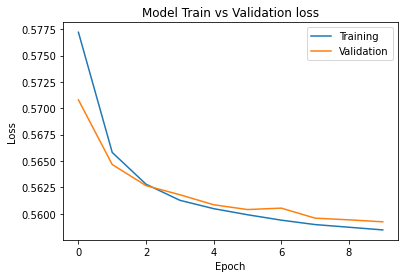

In [ ]:
# Training vs validation loss plot
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Train vs Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


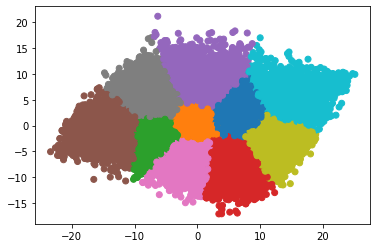

In [ ]:
# K-mean clustering 

predictions = predictions.reshape(len(predictions), -1)
pca = PCA(2)
predictions = pca.fit_transform(predictions)
kmeans = KMeans(10)
cluster_result = kmeans.fit_predict(predictions)
plt.scatter(predictions[:, 0], predictions[:, 1], c=cluster_result, cmap='tab10')


In [ ]:
# ASC (Average Silhouette Coefficient) calculation

print('Average Silhouette Coefficient value: ', silhouette_score(predictions, kmeans.labels_, metric='euclidean'))

Average Silhouette Coefficient value:  0.32497495


Breaking iteration at :  83


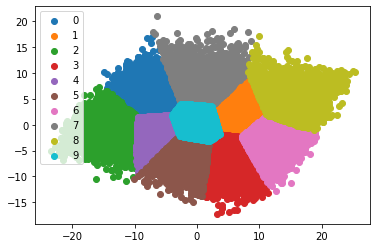

In [ ]:
predictions = predictions.reshape(len(predictions), -1)

#dimentionality reduction
pca = PCA(2)
predictions = pca.fit_transform(predictions)


cluster_count = 10
cluster_group = []
distances = []
iterations = 5000

#initializing centroids to a random value
initial_index = np.random.choice(len(predictions), cluster_count, replace=False)
centroids = predictions[initial_index]

#defining initial 10 clusters  
distances = cdist(predictions,centroids,'euclidean')
category = np.array([np.argmin(i) for i in distances])

for j in range(iterations):
  #retaining previous centroid value for termination condition
  previous_centroids = centroids

  #clearning centroid array for recalculation in every iteration
  centroids = []

  for index in range(cluster_count):
    #recalculating centroids based on mean
    new_mean = predictions[category == index].mean(axis = 0)
    centroids.append(new_mean)
  
  #reshape of array while preserving index
  centroids = np.vstack(centroids)

  #termination condition
  if (previous_centroids == centroids).all():
    print("Breaking iteration at : ", j)
    break;
  distances = cdist(predictions,centroids,'euclidean')
  category = np.array([np.argmin(i) for i in distances])


#Plotting the result and result should be clustered 
unique_labels = np.unique(category)
for i in unique_labels:
    plt.scatter(predictions[category == i , 0] , predictions[category == i , 1] , label = i)
plt.legend()
plt.show()


In [ ]:

# ASC (Average Silhouette Coefficient) calculation
print('ASC value : ',silhouette_score(predictions,category))

ASC value :  0.32546213
